# Project Description
The purpose of this project is to develope a model capable of predicting Parkinson disease in people. The dataset used in this project is fetched from UCI ML repository.

Required information about this dataset is as follows:
<br>
Number of Instances: 195
<br>
Number of Features: 23

## Importing and Analyzing the Dataset
To get an intuition about the dataset, We need to import and analyze it.

In [535]:
dataset <- read.csv("PD_data.csv")

In [536]:
head(dataset)

name,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,...,Shimmer.DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


In [537]:
no_cols <- ncol(dataset)
no_signals <- nrow(dataset)
no_cols
no_signals

[1] 24

[1] 195

$status$ column in this dataset is the class label of people. 1 indicates Parkinson, and 0 indicates healthy. Therfore we have to split the data into two sets including feature matrix and labels.

In [538]:
index <- match("status", names(dataset))

Since we don't need the name of individuals, we discard this column from our dataset.

In [539]:
dataset <- dataset[,2:no_cols]

In [540]:
head(dataset)

MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,Shimmer.DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


In [541]:
y <- dataset[,index-1]
dataset <- dataset[,-(index - 1)]

In [542]:
#labels
y

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 [38] 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
[186] 0 0 0 0 0 0 0 0 0 0

In [543]:
#feature matrix
X <- dataset[,]
head(X)

MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,MDVP.APQ,Shimmer.DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775


### Taking Care of Missing Data
In this part, I will take care of any missing data in the dataset. 

In [544]:
#The following for loop removes NA values and 
#replaces them with the average of the corresponding column
for(i in 1:ncol(X)){
    X[,i] <- ifelse(is.na(X[,i]),
                   ave(X[,i] , FUN=function(x) mean(x, na.rm = TRUE)),
                    X[,i])
}

### Correlation Heatmap Visualization
In order to see how the features of this dataset are correlated, we need to plot correlation heatmap.

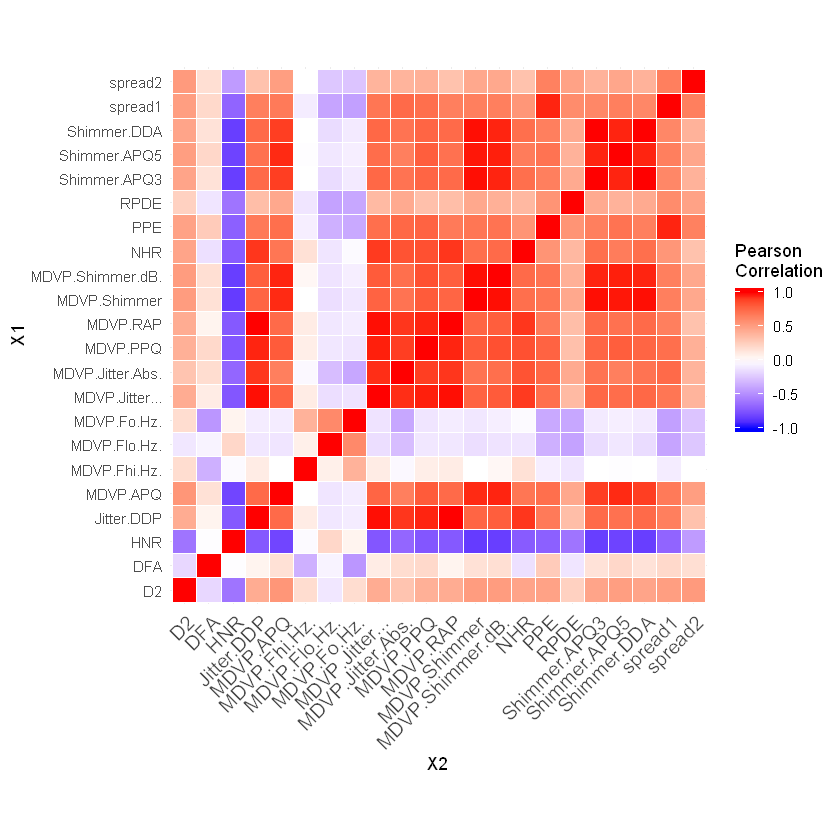

In [545]:
library(ggplot2)
library(reshape)

cormat <- round(x = cor(X), digits = 2)
melted_cormat <- melt(cormat)

# Heatmap
ggplot(data = melted_cormat, aes(X2, X1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

By evaluating the diagram above, we can detect the most correlated variables. If two variables are highly correlted, then we need to use only one of them. 

### Split the Dataset Into Train and Test Set
To prepare the data for furthur analysis we ought to split it into train and test set.

In [550]:
X$class <- y
library(caTools)

In [551]:
split_param <- sample.split(X$class , SplitRatio = 2/3)
X_train <- subset(X, split_param == TRUE)
X_test <- subset(X, split_param == FALSE)

In [ ]:
nocol <- 

### Normalizing the Feature Matrix 

In [552]:
X_train[, 1:(ncol(X_train)-1)] <- scale(X_train[,1:(ncol(X_train)-1)])
X_test[, 1:(ncol(X_train)-1)] <- scale(X_test[,1:(ncol(X_train)-1)])

In [553]:
head(X_train)

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,Shimmer.DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,class
1,-0.8810978,-0.4873075,-0.94907004,0.3292840,0.7643557,0.1248347,0.76409973,0.1237165,0.7041585,0.6946034,...,0.5552351,-0.07223616,-0.18237187,-0.7602555,1.834407,0.8606610,0.5272320,-0.25235264,0.9089526,1
2,-0.8227927,-0.5713125,-0.07955657,0.7032323,1.0478542,0.4382537,1.28024732,0.4371317,1.6173593,1.7020049,...,1.4564556,-0.13986934,-0.59977755,-0.3378556,1.915629,1.5358799,1.3385755,0.22456255,1.8434703,1
3,-0.9612433,-0.7416042,-0.13026438,0.8698832,1.3313528,0.6988864,1.58920890,0.6999606,1.1498628,0.9766758,...,1.0991838,-0.28856642,-0.26422452,-0.6137688,2.026207,1.1991238,1.0519144,-0.14736406,1.4426132,1
4,-0.9613885,-0.6759692,-0.13449750,0.7621698,1.3313528,0.5603222,1.28751700,0.5591987,1.2842486,1.1529711,...,1.2571654,-0.27801372,-0.26572444,-0.5645844,1.910145,1.4971616,1.3216344,0.01544193,1.8468182,1
8,-1.1876359,-0.9092939,-0.29242185,-0.6746859,-0.3696385,-0.6207728,-0.58806153,-0.6218817,-0.7522931,-0.7762029,...,-0.7243844,-0.52000623,1.07305930,1.3978554,0.836908,-0.3789490,-0.4444009,-0.86131314,-0.4357540,1
9,-1.4685565,-0.7323124,-0.57375611,-0.1442484,0.4808571,-0.1291997,-0.04283522,-0.1281153,-0.4793706,-0.4890935,...,-0.4938763,-0.34588675,-0.01545245,1.1858703,1.034882,0.2332046,1.2467552,-0.19815942,0.3185337,1


## Feature Selection
To reduce the number of features and computation cost of model training procedure, we need to select the best features. To do so, I use the following approach:

"In each pair of variables which has a high correlation coefficient, we delete one of them randomly"
<br>

In [554]:
cormat[upper.tri(cormat)] <- NA
for (i in 1:ncol(cormat)){
    cormat[i,i] <- NA
}
cormat

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Jitter.Abs.,MDVP.RAP,MDVP.PPQ,Jitter.DDP,MDVP.Shimmer,MDVP.Shimmer.dB.,...,MDVP.APQ,Shimmer.DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
MDVP.Fo.Hz.,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.Fhi.Hz.,0.40,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.Flo.Hz.,0.60,0.08,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.Jitter...,-0.12,0.10,-0.14,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.Jitter.Abs.,-0.38,-0.03,-0.28,0.94,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.RAP,-0.08,0.10,-0.10,0.99,0.92,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.PPQ,-0.11,0.09,-0.10,0.97,0.90,0.96,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Jitter.DDP,-0.08,0.10,-0.10,0.99,0.92,1.00,0.96,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.Shimmer,-0.10,0.00,-0.14,0.77,0.70,0.76,0.80,0.76,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MDVP.Shimmer.dB.,-0.07,0.04,-0.12,0.80,0.72,0.79,0.84,0.79,0.99,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [555]:
#Getting index of variables that have a correlation coefficient more than 0.9
maxIdx <- which(cormat >= 0.9, arr.ind = T)
maxIdx

,row,col
MDVP.Jitter.Abs.,5,4
MDVP.RAP,6,4
MDVP.PPQ,7,4
Jitter.DDP,8,4
NHR,15,4
MDVP.RAP,6,5
MDVP.PPQ,7,5
Jitter.DDP,8,5
MDVP.PPQ,7,6
Jitter.DDP,8,6


In [556]:
#Getting row numbers
rows_to_be_dropped <- unique(maxIdx[,1])
rows_to_be_dropped

[1]  5  6  7  8 15 10 11 12 13 14 22

In [557]:
X_train_ <- X_train[, -c(5,6,7,8,15,10,11,12,13,14,22)]
X_test_  <- X_test[, -c(5,6,7,8,15,10,11,12,13,14,22)]

In [558]:
head(X_train_)

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Shimmer,HNR,RPDE,DFA,spread1,spread2,D2,class
1,-0.8810978,-0.4873075,-0.94907004,0.3292840,0.7041585,-0.18237187,-0.7602555,1.834407,0.8606610,0.5272320,-0.25235264,1
2,-0.8227927,-0.5713125,-0.07955657,0.7032323,1.6173593,-0.59977755,-0.3378556,1.915629,1.5358799,1.3385755,0.22456255,1
3,-0.9612433,-0.7416042,-0.13026438,0.8698832,1.1498628,-0.26422452,-0.6137688,2.026207,1.1991238,1.0519144,-0.14736406,1
4,-0.9613885,-0.6759692,-0.13449750,0.7621698,1.2842486,-0.26572444,-0.5645844,1.910145,1.4971616,1.3216344,0.01544193,1
8,-1.1876359,-0.9092939,-0.29242185,-0.6746859,-0.7522931,1.07305930,1.3978554,0.836908,-0.3789490,-0.4444009,-0.86131314,1
9,-1.4685565,-0.7323124,-0.57375611,-0.1442484,-0.4793706,-0.01545245,1.1858703,1.034882,0.2332046,1.2467552,-0.19815942,1


In [559]:
head(X_test_)

,MDVP.Fo.Hz.,MDVP.Fhi.Hz.,MDVP.Flo.Hz.,MDVP.Jitter...,MDVP.Shimmer,HNR,RPDE,DFA,spread1,spread2,D2,class
5,-0.8160417,-0.59827546,-0.08632424,1.3968618,1.95831114,-0.56962161,-0.8705707,1.7621220,1.66483237,-0.02353686,-0.0382708,1
6,-0.7068331,-0.78215421,-0.01073535,0.7298959,1.00622453,-0.13008078,-0.8875603,1.7878836,1.20651777,0.78936902,-0.4281182,1
7,-0.7136917,-0.67683822,0.01419547,-0.6103680,-0.70189837,0.76171173,0.8235026,0.7971255,-0.08160567,0.26802350,-1.3251689,1
10,-1.3204039,-0.97365201,-0.55523118,-0.1903483,-0.02262544,-0.00703985,0.3589133,1.3554458,0.49461377,1.12769179,0.2329457,1
11,-1.4821954,-1.10980782,-0.72788856,-0.2473359,-0.40644226,-0.19617714,0.9666347,0.9928814,0.27438891,1.94573198,0.1642628,1
14,-0.2587117,0.04861617,-0.90928259,-0.4900609,-0.68312172,0.76247438,-0.7491212,-0.8002419,-0.10557767,0.23413460,0.4664713,1


## Defining the Neural Netwok as Classifier
Now that we have achieved modified feature matrix, it's time to train a neural network as our classifier model.

In [679]:
library(h2o)
h2o.init(nthreads = -1)
model = h2o.deeplearning(y = 'class',
                         training_frame = as.h2o(X_train_),
                         activation = 'Rectifier',
                         hidden = c(7,7),
                         epochs = 100,
                         train_samples_per_iteration = -2)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         20 minutes 46 seconds 
    H2O cluster timezone:       Asia/Tehran 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.36.0.1 
    H2O cluster version age:    14 days, 11 hours and 4 minutes  
    H2O cluster name:           H2O_started_from_R_mimte_spl551 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.99 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  8 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, Infogram, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.1 (2019-07-05) 



Warning message in use.package("data.table"):
"data.table cannot be used without R package bit64 version 0.9.7 or higher.  Please upgrade to take advangage of data.table speedups."

  |======================================================================| 100%


Warning message in .h2o.processResponseWarnings(res):
"Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training..
"

  |======================================================================| 100%


In [680]:
# Predicting the Test set results
y_pred = h2o.predict(model, newdata = as.h2o(X_test_[-ncol(X_test_)]))
y_pred = (y_pred > 0.5)
y_pred = as.vector(y_pred)

# Making the Confusion Matrix
cm = table(X_test_[, ncol(X_test_)], y_pred)

Warning message in use.package("data.table"):
"data.table cannot be used without R package bit64 version 0.9.7 or higher.  Please upgrade to take advangage of data.table speedups."

  |======================================================================| 100%
  |======================================================================| 100%


In [681]:
y_pred

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1

In [682]:
cm

   y_pred
     0  1
  0  4 12
  1  0 49

In [683]:
accuracy = round((cm[1,1] + cm[2,2])/sum(cm)*100 ,2)
accuracy

[1] 81.54